In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('hotel_bookings_data_bersih.csv')

In [ ]:
df.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
39133,Resort Hotel,0,150,2019,October,33,16,2,5,2,...,0,1,No Deposit,240.0,0,Personal,261.0,0,2,Check-Out
6769,Resort Hotel,1,170,2018,September,27,1,2,5,2,...,0,0,No Deposit,2.0,0,Personal,57.8,0,0,Canceled


In [ ]:
df['reservation_status'].value_counts()

reservation_status
Check-Out    74745
Canceled     42950
No-Show       1203
Name: count, dtype: int64

## PERBANDINGAN JUMLAH PEMESANAN

In [ ]:
comp_df = df.groupby(['hotel', 'arrival_date_year', 'arrival_date_month']).agg({'reservation_status' : 'count'})
comp_df

reservation_status
hotel        arrival_date_year arrival_date_month                    
City Hotel   2017              December                          3372
                               February                          1654
                               January                           1234
                               November                          3529
                               October                           2476
                               September                         1398
             2018              April                             2371
                               August                            3923
                               December                          4219
                               February                          2475
                               January                           3120
                               July                              3676
                               June                              3561
                               March                             1364
                               May                               3046
                               November                          3871
                               October                           3378
                               September                         3131
             2019              April                             2594
                               August                            3971
                               July                              4556
                               June                              3915
                               March                             2372
                               May                               3412
                               October                           3125
                               September                         3559
Resort Hotel 2017              December                          1547
                               February                          1246
                               January                           1086
                               November                          1555
                               October                           1397
                               September                         1365
             2018              April                             1486
                               August                            1357
                               December                          1957
                               February                          1353
                               January                           1312
                               July                              1790
                               June                              1843
                               March                              851
                               May                               1742
                               November                          1512
                               October                           1676
                               September                         1421
             2019              April                             1561
                               August                            1676
                               July                              1757
                               June                              1726
                               March                             1287
                               May                               1539
                               October                           1800
                               September                         1754

In [ ]:
comp = comp_df.reset_index()

In [ ]:
comp.head()

,hotel,arrival_date_year,arrival_date_month,reservation_status
0,City Hotel,2017,December,3372
1,City Hotel,2017,February,1654
2,City Hotel,2017,January,1234
3,City Hotel,2017,November,3529
4,City Hotel,2017,October,2476


In [ ]:
pivot_df = comp.pivot_table(index=['arrival_date_year', 'arrival_date_month'], columns='hotel', values='reservation_status', fill_value=0)

In [ ]:
pivot_df

hotel                                 City Hotel  Resort Hotel
arrival_date_year arrival_date_month                          
2017              December                3372.0        1547.0
                  February                1654.0        1246.0
                  January                 1234.0        1086.0
                  November                3529.0        1555.0
                  October                 2476.0        1397.0
                  September               1398.0        1365.0
2018              April                   2371.0        1486.0
                  August                  3923.0        1357.0
                  December                4219.0        1957.0
                  February                2475.0        1353.0
                  January                 3120.0        1312.0
                  July                    3676.0        1790.0
                  June                    3561.0        1843.0
                  March                   1364.0         851.0
                  May                     3046.0        1742.0
                  November                3871.0        1512.0
                  October                 3378.0        1676.0
                  September               3131.0        1421.0
2019              April                   2594.0        1561.0
                  August                  3971.0        1676.0
                  July                    4556.0        1757.0
                  June                    3915.0        1726.0
                  March                   2372.0        1287.0
                  May                     3412.0        1539.0
                  October                 3125.0        1800.0
                  September               3559.0        1754.0

In [ ]:
df2 = pivot_df.reset_index()

In [ ]:
df2

hotel,arrival_date_year,arrival_date_month,City Hotel,Resort Hotel
0,2017,December,3372.0,1547.0
1,2017,February,1654.0,1246.0
2,2017,January,1234.0,1086.0
3,2017,November,3529.0,1555.0
4,2017,October,2476.0,1397.0
5,2017,September,1398.0,1365.0
6,2018,April,2371.0,1486.0
7,2018,August,3923.0,1357.0
8,2018,December,4219.0,1957.0
9,2018,February,2475.0,1353.0


In [ ]:
df2.to_csv('pivot_tugas_2.csv', index=False)

## LOAD DATASET PIVOT

In [ ]:
df_pivot = pd.read_csv('pivot_tugas_2.csv')

In [ ]:
df_pivot

,arrival_date_year,arrival_date_month,City Hotel,Resort Hotel
0,2017,December,3372.0,1547.0
1,2017,February,1654.0,1246.0
2,2017,January,1234.0,1086.0
3,2017,November,3529.0,1555.0
4,2017,October,2476.0,1397.0
5,2017,September,1398.0,1365.0
6,2018,April,2371.0,1486.0
7,2018,August,3923.0,1357.0
8,2018,December,4219.0,1957.0
9,2018,February,2475.0,1353.0


## NORMALISASI

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

mask = df_pivot['arrival_date_month'].isin(['September', 'October'])
september_october_data = df_pivot[mask].copy()

In [ ]:
september_october_data

,arrival_date_year,arrival_date_month,City Hotel,Resort Hotel
4,2017,October,2476.0,1397.0
5,2017,September,1398.0,1365.0
16,2018,October,3378.0,1676.0
17,2018,September,3131.0,1421.0
24,2019,October,3125.0,1800.0
25,2019,September,3559.0,1754.0


In [ ]:
september_october_data['Normalized City Hotel'] = scaler.fit_transform(september_october_data[['City Hotel']])
september_october_data['Normalized Resort Hotel'] = scaler.fit_transform(september_october_data[['Resort Hotel']])

In [ ]:
df_updated = pd.concat([df_pivot[~df_pivot['arrival_date_month'].isin(['September', 'October'])], september_october_data])
df_updated = df_updated.sort_values(by=['arrival_date_year', 'arrival_date_month']).reset_index(drop=True)

df_updated

## SORTIR BERDASARKAN TAHUN DAN BULAN

In [ ]:
df_updated['arrival_date_month'] = pd.Categorical(df_updated['arrival_date_month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

In [ ]:
df_updated = df_updated.sort_values(by=['arrival_date_year', 'arrival_date_month']).reset_index(drop=True)

In [ ]:
df_updated

,arrival_date_year,arrival_date_month,City Hotel,Resort Hotel,Normalized City Hotel,Normalized Resort Hotel
0,2017,January,1234.0,1086.0,NaN,NaN
1,2017,February,1654.0,1246.0,NaN,NaN
2,2017,September,1398.0,1365.0,0.000000,0.000000
3,2017,October,2476.0,1397.0,0.498843,0.073563
4,2017,November,3529.0,1555.0,NaN,NaN
5,2017,December,3372.0,1547.0,NaN,NaN
6,2018,January,3120.0,1312.0,NaN,NaN
7,2018,February,2475.0,1353.0,NaN,NaN
8,2018,March,1364.0,851.0,NaN,NaN
9,2018,April,2371.0,1486.0,NaN,NaN


## MEMPERSINGKAT NAMA BULAN

In [ ]:
month_abbr_dict = {
    'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr',
    'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Aug',
    'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'
}

In [ ]:
df_updated['arrival_date_month'] = df_updated['arrival_date_month'].map(month_abbr_dict)

In [ ]:
df_updated

,arrival_date_year,arrival_date_month,City Hotel,Resort Hotel,Normalized City Hotel,Normalized Resort Hotel
0,2017,Jan,1234.0,1086.0,NaN,NaN
1,2017,Feb,1654.0,1246.0,NaN,NaN
2,2017,Sep,1398.0,1365.0,0.000000,0.000000
3,2017,Oct,2476.0,1397.0,0.498843,0.073563
4,2017,Nov,3529.0,1555.0,NaN,NaN
5,2017,Dec,3372.0,1547.0,NaN,NaN
6,2018,Jan,3120.0,1312.0,NaN,NaN
7,2018,Feb,2475.0,1353.0,NaN,NaN
8,2018,Mar,1364.0,851.0,NaN,NaN
9,2018,Apr,2371.0,1486.0,NaN,NaN


## VISUALIZATION

In [ ]:
df_melted = pd.melt(df_updated, id_vars=['arrival_date_year', 'arrival_date_month'], value_vars=['City Hotel', 'Resort Hotel'],
                    var_name='Hotel Type', value_name='Value')

C:\Users\sanny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sanny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


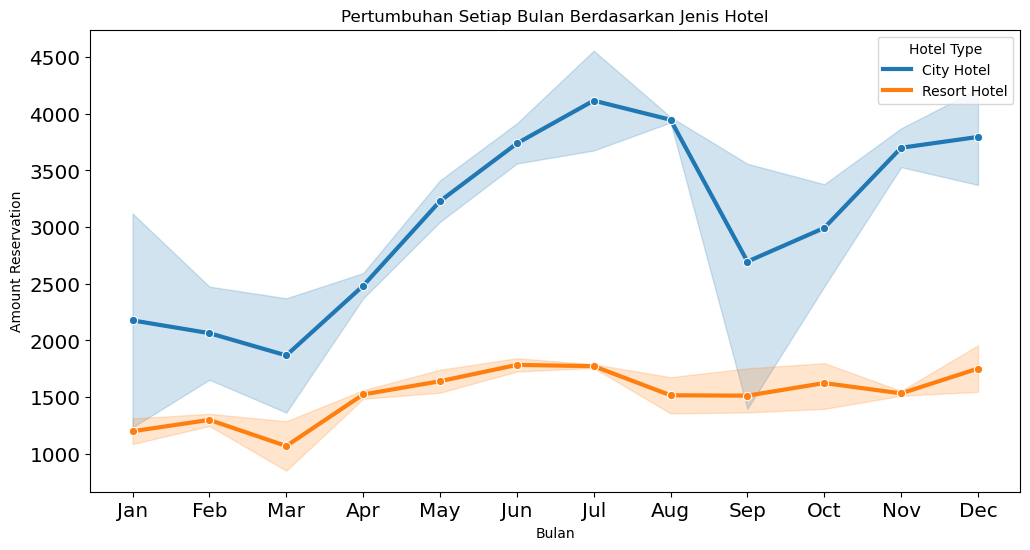

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='arrival_date_month', y='Value', hue='Hotel Type', marker='o')

# Menambahkan judul dan label
plt.title('Pertumbuhan Setiap Bulan Berdasarkan Jenis Hotel')
plt.xlabel('Bulan')
plt.ylabel('Amount Reservation')

# Menampilkan grafik
plt.show()